In [56]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
#from dtreeviz.trees import *
#from IPython.display import Image, display_svg, SVG

In [3]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [4]:
pd.set_option('display.max_columns', None)

In [11]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [12]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [13]:
import pandas as pd
df = pd.read_csv("modeling_table_1.csv")

C:\Anaconda3\envs\benedito_deep\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (87,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_start_dawn_previous,cnt_appl_start_morning_previous,cnt_appl_start_afternoon_previous,cnt_appl_start_night_previous,min_rate_down_payment_previous,max_interest_rate_primary_previous,max_interest_rate_privileged_previous,cnt_purpose_repair_previous,cnt_purpose_edu_bus_dev_previous,cnt_purpose_medicine_urgent_previous,cnt_purpose_superfluous_previous,cnt_purpose_real_estate_previous,cnt_purpose_house_needs_previous,cnt_purpose_car_previous,cnt_purpose_payment_previous,cnt_approved_contract_previous,cnt_canceled_previous,cnt_refused_previous,cnt_unused_previous,cnt_cash_bank_payment_previous,cnt_cashless_employer_payment_previous,cnt_noncash_account_payment_previous,cnt_unacompanied_suite_previous,cnt_family_suite_previous,cnt_spouse_suite_previous,cnt_group_people_suite_previous,cnt_children_suite_previous,max_client_type_previous,cnt_goods_leisure_previous,cnt_goods_electronic_previous,cnt_goods_vehicles_previous,cnt_goods_superfluous_previous,cnt_goods_medicine_previous,cnt_goods_homeware_previous,cnt_goods_construction_previous,cnt_goods_office_edu_previous,cnt_goods_weapon_previous,cnt_portfolio_cards_previous,cnt_portfolio_cash_previous,cnt_portfolio_pos_previous,cnt_portfolio_cars_previous,cnt_product_xsell_previous,cnt_product_walkin_previous,cnt_channel_regional_previous,cnt_channel_cash_previous,cnt_channel_contact_center_previous,cnt_channel_corporate_car_previous,cnt_seller_electronics_previous,cnt_seller_connectivity_previous,cnt_seller_furniture_previous,cnt_seller_industry_previous,cnt_seller_construction_previous,cnt_seller_superfluous_previous,max_cnt_payment_previous,cnt_yield_low_normal_previous,cnt_yield_low_action_previous,cnt_yield_high_previous,cnt_yield_middle_previous,cnt_insured_on_approval_previous,cnt_historical_credit_card_p

In [16]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_start_dawn_previous,cnt_appl_start_morning_previous,cnt_appl_start_afternoon_previous,cnt_appl_start_night_previous,min_rate_down_payment_previous,max_interest_rate_primary_previous,max_interest_rate_privileged_previous,cnt_purpose_repair_previous,cnt_purpose_edu_bus_dev_previous,cnt_purpose_medicine_urgent_previous,cnt_purpose_superfluous_previous,cnt_purpose_real_estate_previous,cnt_purpose_house_needs_previous,cnt_purpose_car_previous,cnt_purpose_payment_previous,cnt_approved_contract_previous,cnt_canceled_previous,cnt_refused_previous,cnt_unused_previous,cnt_cash_bank_payment_previous,cnt_cashless_employer_payment_previous,cnt_noncash_account_payment_previous,cnt_unacompanied_suite_previous,cnt_family_suite_previous,cnt_spouse_suite_previous,cnt_group_people_suite_previous,cnt_children_suite_previous,max_client_type_previous,cnt_goods_leisure_previous,cnt_goods_electronic_previous,cnt_goods_vehicles_previous,cnt_goods_superfluous_previous,cnt_goods_medicine_previous,cnt_goods_homeware_previous,cnt_goods_construction_previous,cnt_goods_office_edu_previous,cnt_goods_weapon_previous,cnt_portfolio_cards_previous,cnt_portfolio_cash_previous,cnt_portfolio_pos_previous,cnt_portfolio_cars_previous,cnt_product_xsell_previous,cnt_product_walkin_previous,cnt_channel_regional_previous,cnt_channel_cash_previous,cnt_channel_contact_center_previous,cnt_channel_corporate_car_previous,cnt_seller_electronics_previous,cnt_seller_connectivity_previous,cnt_seller_furniture_previous,cnt_se

In [17]:
data = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','DAYS_BIRTH', 'FLAG_OWN_CAR', 
           'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE',
           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
           'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1',
           'EXT_SOURCE_2','EXT_SOURCE_3',
           'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'amt_credit_sum_debt_consumer_credit_bureau',
           'amt_credit_sum_limit_consumer_credit_bureau']]

In [18]:
data.loc[:,'UI_consumer_credit_bureau'] = data.loc[:,'amt_credit_sum_debt_consumer_credit_bureau']/data.loc[:,'amt_credit_sum_limit_consumer_credit_bureau']
data.loc[:,'AGE'] = round(data.loc[:,'DAYS_BIRTH']/(365*(-1)))


C:\Anaconda3\envs\benedito_deep\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\envs\benedito_deep\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,HOUSETYPE_MODE,WALLSMATERIAL_MODE,amt_credit_sum_debt_consumer_credit_bureau,amt_credit_sum_limit_consumer_credit_bureau,UI_consumer_credit_bureau,AGE
0,226605,0,Revolving loans,F,-17704,N,N,0,180000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,2.0,1,NaN,0.440461,NaN,specific housing,"Stone, brick",NaN,NaN,NaN,49.0
1,198289,0,Revolving loans,M,-11106,Y,Y,1,468000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,3.0,1,0.660018,0.753449,0.638044,block of flats,Panel,NaN,NaN,NaN,30.0
2,119805,0,Cash loans,M,-12355,Y,Y,1,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,High skill tech staff,3.0,2,NaN,0.554713,NaN,block of flats,Panel,NaN,NaN,NaN,34.0
3,104932,0,Cash loans,F,-23113,Y,Y,0,117000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Accountants,2.0,2,0.809643,0.221807,0.786267,block of flats,"Stone, brick",NaN,NaN,NaN,63.0
4,383641,0,Cash loans,F,-21928,N,Y,0,157500.0,Children,State servant,Secondary / secondary special,Widow,House / apartment,Medicine staff,1.0,2,NaN,0.515801,0.750375,block of flats,Panel,NaN,NaN,NaN,60.0


In [20]:
def check_string(x):
    if x in ('NaN', 'NA', 'n/a', 'N/A', 'inf', '-inf', 'Inf', '-Inf'):
        return True
    else:
        return False

problem = {'type_problem': ['missing', 'NaN', 'Inf', 'NA', 'string', 'zeroes']}

df_problem = pd.DataFrame(problem)
df_problem=df_problem.set_index('type_problem')
feats = data.columns

In [21]:
for i,feat in enumerate(feats):
    if isinstance(data.iloc[0,i], (str)):
        print('string: ',feat)
        df_problem.loc['missing', feat]=data[feat].isnull().sum()
        df_problem.loc['NA', feat]=pd.isna(data[feat]).sum()
        df_problem.loc['string',feat]=data[feat].apply(check_string).sum()
    elif isinstance(data.iloc[0,i], (int, float)):
        print('numero: ',feat)
        df_problem.loc['missing',feat]=data[feat].isnull().sum()
        df_problem.loc['NA',feat]=pd.isna(data[feat]).sum()
        df_problem.loc['NaN',feat]=np.isnan(data[feat]).sum()
        df_problem.loc['Inf',feat]=np.isinf(data[feat]).sum()
        df_problem.loc['zeroes',feat]=(data[feat]==0).sum()
        df_problem.loc['string',feat]=data[feat].apply(check_string).sum()
    else:
        print('nao achou: ', feat)
df_problem.head()

nao achou:  SK_ID_CURR
nao achou:  TARGET
string:  NAME_CONTRACT_TYPE
string:  CODE_GENDER
nao achou:  DAYS_BIRTH
string:  FLAG_OWN_CAR
string:  FLAG_OWN_REALTY
nao achou:  CNT_CHILDREN
numero:  AMT_INCOME_TOTAL
string:  NAME_TYPE_SUITE
string:  NAME_INCOME_TYPE
string:  NAME_EDUCATION_TYPE
string:  NAME_FAMILY_STATUS
string:  NAME_HOUSING_TYPE
string:  OCCUPATION_TYPE
numero:  CNT_FAM_MEMBERS
nao achou:  REGION_RATING_CLIENT
numero:  EXT_SOURCE_1
numero:  EXT_SOURCE_2
numero:  EXT_SOURCE_3
string:  HOUSETYPE_MODE
string:  WALLSMATERIAL_MODE
numero:  amt_credit_sum_debt_consumer_credit_bureau
numero:  amt_credit_sum_limit_consumer_credit_bureau
numero:  UI_consumer_credit_bureau
numero:  AGE


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,HOUSETYPE_MODE,WALLSMATERIAL_MODE,amt_credit_sum_debt_consumer_credit_bureau,amt_credit_sum_limit_consumer_credit_bureau,UI_consumer_credit_bureau,AGE
type_problem,,,,,,,,,,,,,,,,,,,,,
missing,0.0,0.0,0.0,0.0,0.0,1292.0,0.0,0.0,0.0,0.0,96391.0,2.0,173378.0,660.0,60965.0,154297.0,156341.0,95908.0,103606.0,173863.0,0.0
NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,173378.0,660.0,60965.0,NaN,NaN,95908.0,103606.0,173863.0,0.0
Inf,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,133631.0,0.0
NA,0.0,0.0,0.0,0.0,0.0,1292.0,0.0,0.0,0.0,0.0,96391.0,2.0,173378.0,660.0,60965.0,154297.0,156341.0,95908.0,103606.0,173863.0,0.0
string,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data.NAME_TYPE_SUITE.fillna("no_info", inplace = True)
data.OCCUPATION_TYPE.fillna("no_info", inplace = True)
data.HOUSETYPE_MODE.fillna("no_info", inplace = True)
data.WALLSMATERIAL_MODE.fillna("no_info", inplace = True)
data.CNT_CHILDREN.fillna(-1, inplace = True)
data.AMT_INCOME_TOTAL.fillna(-1, inplace = True)
data.CNT_FAM_MEMBERS.fillna(-1, inplace = True)
data.REGION_RATING_CLIENT.fillna(-1, inplace = True)
data.EXT_SOURCE_1.fillna(-1, inplace = True)
data.EXT_SOURCE_2.fillna(-1, inplace = True)
data.EXT_SOURCE_3.fillna(-1, inplace = True)
data.amt_credit_sum_debt_consumer_credit_bureau.fillna(-1, inplace = True)
data.amt_credit_sum_limit_consumer_credit_bureau.fillna(-1, inplace = True)
data.UI_consumer_credit_bureau.fillna(-1, inplace = True)




C:\Anaconda3\envs\benedito_deep\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [23]:
data = pd.get_dummies(data, ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'], drop_first=True)

In [24]:
data = data.drop(['DAYS_BIRTH'], axis = 1)

In [25]:
data.set_index('SK_ID_CURR', inplace=True)

In [26]:
data = data.replace([np.inf, -np.inf], 0)

In [27]:
np.random.seed(12345)
sample = data.sample(30750)

In [28]:
sample.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,amt_credit_sum_debt_consumer_credit_bureau,amt_credit_sum_limit_consumer_credit_bureau,UI_consumer_credit_bureau,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_no_info,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_no_info,HOUSETYPE_MODE_no_info,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_no_info
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120666,0,0,157500.0,2.0,2,-1.000000,0.408633,0.786267,-1.000,-1.0,-1.0,41.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
197940,1,0,67500.0,2.0,3,-1.000000,0.026057,0.187389,231853.185,-1.0,-1.0,47.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
326330,0,0,270000.0,2.0,2,0.481371,0.608203,0.328063,364223.880,0.0,0.0,40.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
225853,0,1,180000.0,3.0,2,-1.000000,0.657798,0.614414,2025000.000,0.0,0.0,41.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
301387,0,0,157500.0,1.0,3,0.669283,0.369350,0.431192,0.000,0.0,-1.0,60.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
valid = data[~data.index.isin(sample.index)]

In [30]:
X = sample.drop(['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2'], axis =1)
y = sample['TARGET']

In [31]:
smote = SMOTE(sampling_strategy = 0.55, random_state = 135811)

In [32]:
X_, y_ = smote.fit_sample(X, y.ravel())

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=1234)

In [34]:
dtree = DecisionTreeClassifier(max_depth = 3, min_samples_split=150, min_samples_leaf = 55,
                              criterion = 'gini', min_impurity_decrease=1e-07, random_state=1234)

In [35]:
class_tree = dtree.fit(X_train, y_train)

In [36]:
acc_train = metrics.accuracy_score(y_train, class_tree.predict(X_train))
f1_train = metrics.f1_score(y_train, class_tree.predict(X_train))
precision_train = metrics.precision_score(y_train, class_tree.predict(X_train))
recall_train = metrics.recall_score(y_train, class_tree.predict(X_train))
auc_train = metrics.roc_auc_score(y_train, class_tree.predict_proba(X_train)[:,1])

print('accuracy_train: ',acc_train)
print('precision_train: ',precision_train)
print('recall_train: ',recall_train)
print('F1_train: ',f1_train)
print('AUC_train: ',auc_train)

accuracy_train:  0.7180154958005078
precision_train:  0.7706943414875216
recall_train:  0.2873859762277711
F1_train:  0.4186577181208054
AUC_train:  0.7548821842192007


In [37]:
acc_test = metrics.accuracy_score(y_test, class_tree.predict(X_test))
f1_test = metrics.f1_score(y_test, class_tree.predict(X_test))
precision_test = metrics.precision_score(y_test, class_tree.predict(X_test))
recall_test = metrics.recall_score(y_test, class_tree.predict(X_test))
auc_test = metrics.roc_auc_score(y_test, class_tree.predict_proba(X_test)[:,1])

print('accuracy_test: ',acc_test)
print('precision_test: ',precision_test)
print('recall_test: ',recall_test)
print('F1_test: ',f1_test)
print('AUC_test: ',auc_test)

accuracy_test:  0.7184200531712875
precision_test:  0.788692175899486
recall_test:  0.2927087749046206
F1_test:  0.42695934456639356
AUC_test:  0.7599977677936282


In [38]:
valid_total = valid.copy()
valid = valid[X_train.columns]

In [39]:
valid_total['score'] = class_tree.predict_proba(valid)[:,1]
valid_total['y_pred'] = class_tree.predict(valid)

In [40]:
acc_valid = metrics.accuracy_score(valid_total['TARGET'], valid_total['y_pred'])
f1_valid = metrics.f1_score(valid_total['TARGET'], valid_total['y_pred'])
precision_valid = metrics.precision_score(valid_total['TARGET'], valid_total['y_pred'])
recall_valid = metrics.recall_score(valid_total['TARGET'], valid_total['y_pred'])
auc_valid = metrics.roc_auc_score(valid_total['TARGET'], valid_total['score'])

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.8811790678599948
precision_valid:  0.09107198504206918
recall_valid:  0.052217804976102206
F1_valid:  0.06637708315589246
AUC_valid:  0.6125232055514849


In [41]:
ks_valid = ks_2samp(valid_total[valid_total['TARGET']==0]['score'],valid_total[valid_total['TARGET']==1]['score'])

In [42]:
ks_valid

KstestResult(statistic=0.2295238374851235, pvalue=0.0)

In [51]:
score_tree = class_tree.predict_proba(data[X.columns])[:,1]
predicted_tree = class_tree.predict(data[X.columns])

In [52]:
data['score_tree']=score_tree
data['predicted_tree']=predicted_tree

In [55]:
data.to_csv("arvore_v0_escorada.csv")

In [57]:
feat_selected = X.columns

In [59]:
import joblib
joblib.dump(class_tree, './final_model/decision_tree.joblib')
joblib.dump(feat_selected, './final_model/feat_selected_decision_tree.joblib')

['./final_model/feat_selected_decision_tree.joblib']

In [35]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [36]:
tree_to_code(class_tree, X_train.columns)

def tree(CNT_CHILDREN, AMT_INCOME_TOTAL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, EXT_SOURCE_3, amt_credit_sum_debt_consumer_credit_bureau, amt_credit_sum_limit_consumer_credit_bureau, UI_consumer_credit_bureau, AGE, NAME_CONTRACT_TYPE_Revolving loans, CODE_GENDER_M, CODE_GENDER_XNA, FLAG_OWN_CAR_Y, FLAG_OWN_REALTY_Y, NAME_TYPE_SUITE_Family, NAME_TYPE_SUITE_Group of people, NAME_TYPE_SUITE_Other_A, NAME_TYPE_SUITE_Other_B, NAME_TYPE_SUITE_Spouse, partner, NAME_TYPE_SUITE_Unaccompanied, NAME_TYPE_SUITE_no_info, NAME_INCOME_TYPE_Commercial associate, NAME_INCOME_TYPE_Maternity leave, NAME_INCOME_TYPE_Pensioner, NAME_INCOME_TYPE_State servant, NAME_INCOME_TYPE_Student, NAME_INCOME_TYPE_Unemployed, NAME_INCOME_TYPE_Working, NAME_EDUCATION_TYPE_Higher education, NAME_EDUCATION_TYPE_Incomplete higher, NAME_EDUCATION_TYPE_Lower secondary, NAME_EDUCATION_TYPE_Secondary / secondary special, NAME_FAMILY_STATUS_Married, NAME_FAMILY_STATUS_Separated, NAME_FAMILY_STATUS_Single / not married, NAME_FAM

In [37]:
from dtreeviz.trees import *

In [38]:
viz = dtreeviz(class_tree, 
               X_train,
               y_train,
               target_name='Default',
               feature_names=X_train.columns, 
               class_names=["nao-default", "default"])  # barstackes is default


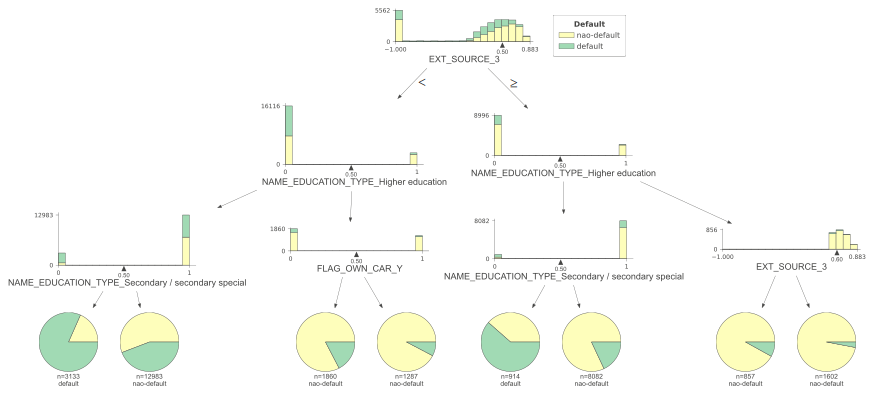

In [39]:
viz

In [40]:
viz2 = dtreeviz(class_tree, 
               valid_total[X_train.columns],
               valid_total['TARGET'],
               target_name='Default',
               feature_names=X_train.columns, 
               class_names=["nao-default", "default"], 
               orientation = 'LR')  # barstackes is default

In [41]:
viz2
viz2.save("./decision_tree_validacao_1510.svg")

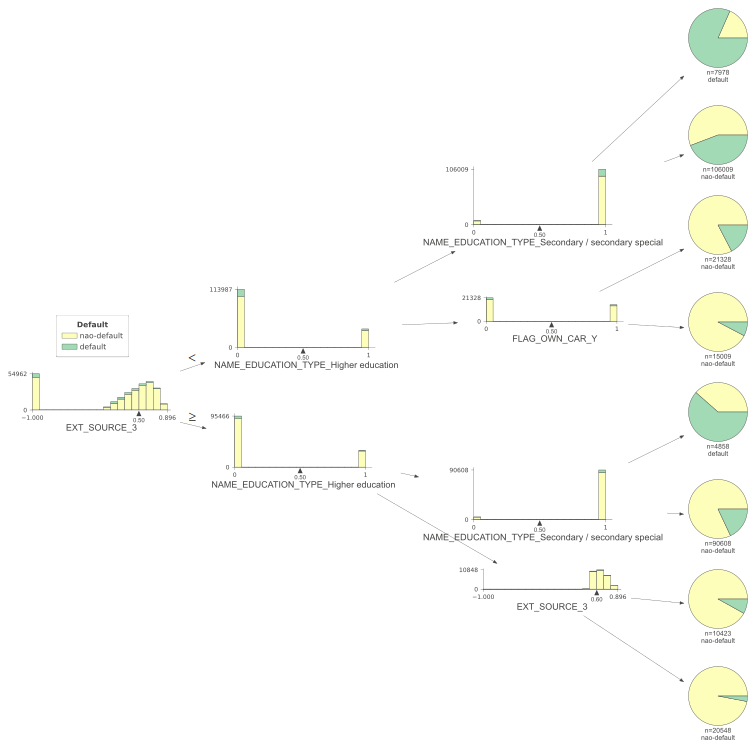

In [42]:
viz2

In [43]:
valid_total.loc[((valid_total.index == 327481)|(valid_total.index == 338548)),X_train.columns]

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_3,amt_credit_sum_debt_consumer_credit_bureau,amt_credit_sum_limit_consumer_credit_bureau,UI_consumer_credit_bureau,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_no_info,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_no_info,HOUSETYPE_MODE_no_info,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_no_info
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327481,0,225000.0,1.0,1,-1.000000,-1.0,-1.0,-1.0,37.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
338548,2,450000.0,4.0,1,0.591977,-1.0,-1.0,-1.0,34.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
def decision_rule(df,i):
    
    if (df.iloc[i,:]['EXT_SOURCE_3'] <= 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] <= 0.5 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Secondary / secondary special'] <= 0.5):        
        return 'grupo_1_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] <= 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] <= 0.5 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Secondary / secondary special'] > 0.5):        
        return 'grupo_2_non_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] <= 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] > 0.5 and
        df.iloc[i,:]['FLAG_OWN_CAR_Y'] <= 0.5):        
        return 'grupo_3_non_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] <= 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] > 0.5 and
        df.iloc[i,:]['FLAG_OWN_CAR_Y'] > 0.5):        
        return 'grupo_4_non_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] > 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] <= 0.5 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Secondary / secondary special'] <= 0.5):        
        return 'grupo_5_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] > 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] <= 0.5 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Secondary / secondary special'] > 0.5):        
        return 'grupo_6_non_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] > 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] > 0.5 and
       df.iloc[i,:]['EXT_SOURCE_3'] <= 0.5980593264102936):        
        return 'grupo_7_non_default'
    if (df.iloc[i,:]['EXT_SOURCE_3'] > 0.49560506641864777 and
        df.iloc[i,:]['NAME_EDUCATION_TYPE_Higher education'] > 0.5 and
       df.iloc[i,:]['EXT_SOURCE_3'] > 0.5980593264102936):        
        return 'grupo_8_non_default'    

In [47]:
groups = [decision_rule(valid_total, i) for i in range(valid_total.shape[0])]

In [48]:
valid_total['grupos'] = groups

In [49]:
valid_total.shape

(276761, 76)

In [50]:
valid_total[valid_total['TARGET']==1].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,amt_credit_sum_debt_consumer_credit_bureau,amt_credit_sum_limit_consumer_credit_bureau,UI_consumer_credit_bureau,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_no_info,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_no_info,HOUSETYPE_MODE_no_info,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_no_info,score,y_pred,grupos
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327481,1,0,225000.0,1.0,1,0.456299,0.723589,-1.000000,-1.0,-1.0,-1.0,37.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.816151,1,grupo_1_default
202166,1,0,247500.0,2.0,2,-1.000000,0.627720,0.669057,-1.0,-1.0,-1.0,54.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.180153,0,grupo_6_non_default
334810,1,0,225000.0,2.0,2,-1.000000,0.652463,0.223831,-1.0,-1.0,-1.0,34.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.442040,0,grupo_2_non_default
338548,1,2,450000.0,4.0,1,-1.000000,0.638755,0.591977,-1.0,-1.0,-1.0,34.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.614880,1,grupo_5_default
440717,1,0,135000.0,2.0,1,-1.000000,0.693144,-1.000000,-1.0,-1.0,-1.0,37.0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.442040,0,grupo_2_non_default


In [51]:
df.reset_index(inplace=True)
#df.set_index(['SK_ID_CURR'], inplace = True)

In [52]:
valid_final = valid_total[['score', 'y_pred', 'grupos']]
valid_final.reset_index(inplace=True)

In [53]:
validacao = pd.merge(valid_final, df, how = 'inner')

In [54]:
validacao.head()

,SK_ID_CURR,score,y_pred,grupos,index,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_start_dawn_previous,cnt_appl_start_morning_previous,cnt_appl_start_afternoon_previous,cnt_appl_start_night_previous,min_rate_down_payment_previous,max_interest_rate_primary_previous,max_interest_rate_privileged_previous,cnt_purpose_repair_previous,cnt_purpose_edu_bus_dev_previous,cnt_purpose_medicine_urgent_previous,cnt_purpose_superfluous_previous,cnt_purpose_real_estate_previous,cnt_purpose_house_needs_previous,cnt_purpose_car_previous,cnt_purpose_payment_previous,cnt_approved_contract_previous,cnt_canceled_previous,cnt_refused_previous,cnt_unused_previous,cnt_cash_bank_payment_previous,cnt_cashless_employer_payment_previous,cnt_noncash_account_payment_previous,cnt_unacompanied_suite_previous,cnt_family_suite_previous,cnt_spouse_suite_previous,cnt_group_people_suite_previous,cnt_children_suite_previous,max_client_type_previous,cnt_goods_leisure_previous,cnt_goods_electronic_previous,cnt_goods_vehicles_previous,cnt_goods_superfluous_previous,cnt_goods_medicine_previous,cnt_goods_homeware_previous,cnt_goods_construction_previous,cnt_goods_office_edu_previous,cnt_goods_weapon_previous,cnt_portfolio_cards_previous,cnt_portfolio_cash_previous,cnt_portfolio_pos_previous,cnt_portfolio_cars_previous,cnt_product_xsell_previous,cnt_product_walkin_previous,cnt_channel_regional_previous,cnt_channel_cash_previous,cnt_channel_contact_center_previous,cnt_channel_corporate_car_previous,cnt_seller_electronics_previous,cnt_seller_connectivity_previous,cnt_seller

In [55]:
validacao.to_csv("validacao_decision_tree_1510.csv")